In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import scipy.optimize as opt

In [7]:
path = 'ex2data2.txt'
data = pd.read_csv(path, names = ['test_1', 'test_2', 'result'])
data.head()

,test_1,test_2,result
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


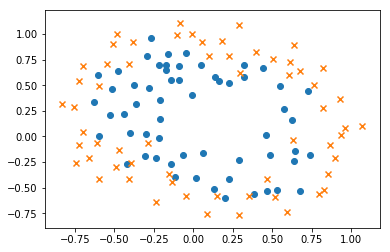

In [8]:
positive = data[data.result.isin(['1'])]
negative = data[data.result.isin(['0'])]
fig, ax = plt.subplots()
ax.scatter(positive.test_1, positive.test_2)
ax.scatter(negative.test_1, negative.test_2, marker = 'x')
plt.show()

In [9]:
def feature_mapping(x1, x2, power):
    data = {}
    for i in np.arange(power + 1):
        for p in np.arange(i + 1):
            data["f{}{}".format(i - p, p)] = np.power(x1, i - p) * np.power(x2, p)
    return pd.DataFrame(data)

In [45]:
x1 = data.test_1.values
x2 = data.test_2.values
data2 = feature_mapping(x1, x2, 6)
data2.head()

,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [17]:
X = data2.values
y = data.result.values
theta = np.zeros(X.shape[1])
X.shape, y.shape, theta.shape

((118, 28), (118,), (28,))

In [18]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [35]:
def cost(theta, X, y):
    first = -y * np.log(sigmoid(X@theta))
    second = -(1-y) * np.log(1 - sigmoid(X@theta))
    return np.mean(first + second)

In [36]:
def costReg(theta, X, y, l = 1):
    _theta = theta[1: ]
    reg = l / (2 * len(X)) * np.sum(np.power(_theta, 2))
    return cost(theta, X, y) + reg

In [41]:
costReg(theta, X, y)

0.6931471805599454

In [42]:
def gradient(theta, X, y):
    return (X.T @ (sigmoid(X@theta) - y)) / len(X)

In [43]:
def gradientReg(theta, X, y, l = 1):
    reg = l / len(X) * theta
    reg[0] = 0
    return gradient(theta, X, y) + reg

In [44]:
gradientReg(theta, X, y)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

In [52]:
result = opt.fmin_tnc(func = costReg, x0 = theta, fprime = gradientReg, args = (X, y))

In [53]:
result

(array([ 1.27271027,  0.62529965,  1.18111686, -2.01987399, -0.91743189,
        -1.43166929,  0.12393228, -0.36553118, -0.35725403, -0.17516291,
        -1.4581701 , -0.05098418, -0.61558551, -0.27469165, -1.19271297,
        -0.2421784 , -0.20603295, -0.04466179, -0.27778953, -0.29539513,
        -0.45645982, -1.04319155,  0.02779373, -0.29244874,  0.01555761,
        -0.32742407, -0.14389151, -0.92467487]), 32, 1)

In [56]:
def predict(theta, X):
    probability = X @ theta
    return [1 if x > 0.5 else 0 for x in probability]

In [57]:
final_theta = result[0]
predictions = predict(final_theta, X)

In [58]:
print(classification_report(predictions, y))

              precision    recall  f1-score   support

           0       0.95      0.73      0.83        78
           1       0.64      0.93      0.76        40

   micro avg       0.80      0.80      0.80       118
   macro avg       0.79      0.83      0.79       118
weighted avg       0.84      0.80      0.80       118



In [68]:
x = np.linspace(-1, 1.5, 250)
xx, yy = np.meshgrid(x, x) #生成图像的点矩阵

In [94]:
# 没看懂怎么画的
z = feature_mapping(xx.ravel(), yy.ravel(), 6).values #将点映射到28维上
z = z @ final_theta #XΘ为函数     点 @ Θ 得出的是什么
z = z.reshape(xx.shape)

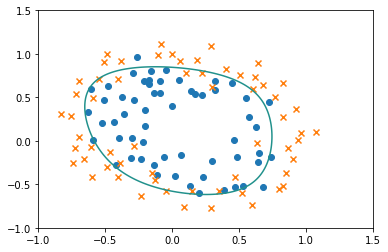

In [95]:
fig, ax = plt.subplots()
ax.scatter(positive.test_1, positive.test_2)
ax.scatter(negative.test_1, negative.test_2, marker = 'x')
plt.contour(xx, yy, z, 0) #画等高线 不选0的画会有多层等高线
plt.show()